# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [39]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [40]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [41]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Boson\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


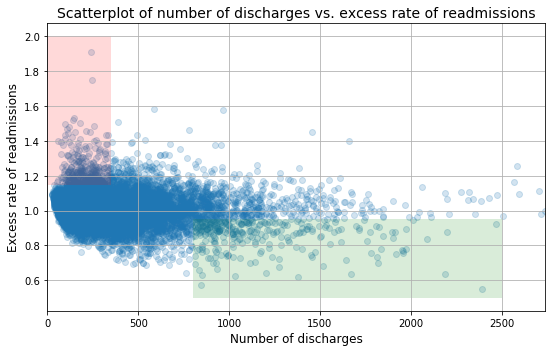

In [42]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [43]:
# take a look at the dataframe
df = clean_hospital_read_df
df.head()


,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [44]:
df.describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,11578.000000,11578.000000,81.0,11497.000000,11497.000000,11497.000000,11497.000000
mean,257681.537226,362.909397,7.0,1.007504,17.984292,17.865695,63.633731
std,154542.645531,309.176945,0.0,0.091964,5.487651,5.240749,59.540296
min,10001.000000,0.000000,7.0,0.549500,2.700000,3.900000,11.000000
25%,110129.750000,157.000000,7.0,0.952600,16.300000,16.600000,24.000000
50%,250040.000000,280.000000,7.0,1.003500,19.000000,19.000000,45.000000
75%,390041.000000,472.750000,7.0,1.058100,21.500000,21.400000,82.000000
max,670082.000000,6793.000000,7.0,1.909500,32.800000,28.000000,879.000000


## A. Do you agree with the above analysis and recommendations? Why or why not?
### Based on the scatterplot,  the determination was made that the rate of readmissions is trending down with increasing number of discharges however I do not feel that this is sufficient data analysis to make any sort of conclusion or recommendation.  More hypothesis testing would be need to be done to know if we can reject or fail to reject the null hypothesis. 

## B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

### Since we have two samples, we will need to first find two sample means and utilize frequentist hypothesis testing.  To start hypothesis testing,a t-test and z score will be used to see the probability of difference between the two sets of data.


In [45]:
#define both samples
df_small = df[(df['Number of Discharges'] < 100) & (df['Number of Discharges'] > 0)]
df_large = df[(df['Number of Discharges'] > 1000)]

In [46]:
#determine mean of <100
df_small_mean = df_small['Excess Readmission Ratio'].mean()
print("<100 discharges mean: ", df_small_mean)

<100 discharges mean:  1.0226183501683506


In [47]:
#determine mean of >1000
df_large_mean = df_large['Excess Readmission Ratio'].mean()
print(">1000 discharges mean: ", df_large_mean)

>1000 discharges mean:  0.9783354211663071


In [48]:
sm_sample_size = len(df[(df['Number of Discharges'] < 100) & (df['Number of Discharges'] > 0)])
print('<100_sample_size: ', sm_sample_size)


<100_sample_size:  1188


In [49]:
lg_sample_size = len( df[(df['Number of Discharges'] > 1000)])
print('>1000_sample_size: ', lg_sample_size)


>1000_sample_size:  463


## null hypoth: Mean(Number of Discharges<100) - Mean(Number of Discharges>1000) = 0
## alt hypoth: Mean(Number of Discharges<100) - Mean(Number of Discharges>1000) != 0

In [50]:
#calculate diff of means and std in order to do z score testing
nullhyp_diff_of_means = 0
diff_of_means = df_large_mean - df_small_mean
print('diff_of_means:', diff_of_means)
df_small_std = df_small['Excess Readmission Ratio'].std()
print('df_small_std: ', df_small_std)
df_large_std = df_large['Excess Readmission Ratio'].std()
print('df_large_std: ', df_large_std)
twosamp_std = (((df_small_std)**2)/(1188)) + (((df_large_std)**2)/(463)) ** .5
print('twosamp_std: ', twosamp_std)

diff_of_means: -0.04428292900204345
df_small_std:  0.05797860323426279
df_large_std:  0.12000735348224047
twosamp_std:  0.005580044254354121


In [51]:
zscre = (diff_of_means - nullhyp_diff_of_means)/ (twosamp_std)
print("z-score: ", zscre)
marg_of_err = (2.58) * (twosamp_std)
print("margin of error: ", marg_of_err)
conf_int = (diff_of_means + marg_of_err), (diff_of_means - marg_of_err)
print("confidence interval: ", conf_int)

z-score:  -7.935945842631871
margin of error:  0.014396514176233633
confidence interval:  (-0.029886414825809816, -0.05867944317827708)


In [52]:
import statsmodels.stats.api as sms
from scipy import stats
two_sample = stats.ttest_ind(df_large['Excess Readmission Ratio'], df_small['Excess Readmission Ratio'])
print('t-statistic: %.2f | p-value: %.5f.' % two_sample)

t-statistic: -10.06 | p-value: 0.00000.


## The large z score indicates a close to zero p value and thus we reject null hypothesis and determine there is a statistical difference between <100 discharges and >1000 discharges.  The t-stats confirms this same statistical determination.  

## 4) Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

### Based on the close to zero p value, there is a statistical difference between the two means and we reject the null hypothesis. Based on our 99% confidence interval calculations there is a wider range which implies that there is a larger chance of obtaining an observation within that interval but that our accuracy is also lower. From a practical significance, we may have gotten different statistical results if we had chosen a smaller test sample as the larger sample may be detecting small effects.  We may also not have had enough variablity in our data since we do not know if socio-economic factors or the particular hospitals we chose to do our data could also cause small effects.  So bottom line, even though our hypothesis testing indicates a statistical difference, it does not necessarily implicate a practical significance due to the factors mentioned above and we may want to do some more detailed data analysis before making a recommendation to the client.



## 5) Look at the scatterplot above. What are the advantages and disadvantages of using this plot to convey information?Construct another plot that conveys the same information in a more direct manner.
### advantages: there are clear labels with the necessary information
### disadvantages:it seems difficult to see the difference between the excess readmissions and not excess readmissions therefore will contruct a plot with more clear delineation

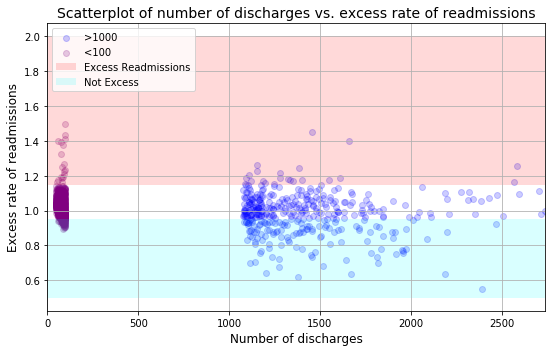

In [53]:
#Re-create scatter plot that better delineates difference between excess readmissions and not.
x = [a for a in df_large['Number of Discharges'][81:-3]]
y = list(df_large['Excess Readmission Ratio'][81:-3])
c = [a for a in df_small['Number of Discharges'][81:-3]]
d = list(df_small['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2, color='blue', label = '>1000')
ax.scatter(c, d,alpha=0.2, color='purple', label = '<100')

ax.fill_between([0,3000], 1.15, 2, facecolor='red', alpha = .15, interpolate=True, label='Excess Readmissions')
ax.fill_between([0,3000], .5, .95, facecolor='cyan', alpha = .15, interpolate=True, label='Not Excess')

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)
ax.legend(loc= 'upper left')

ax.grid(True)
fig.tight_layout()